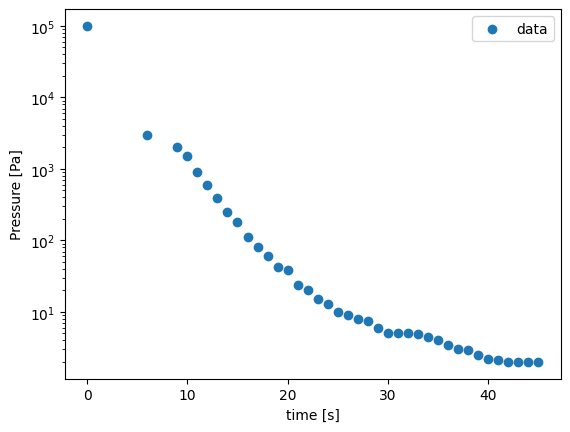

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_df_b_s = pd.read_csv('油回転ポンプ実験b/油回転ポンプ.csv')

fig,ax = plt.subplots()
ax.scatter(data_df_b_s['second'],data_df_b_s['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.set_yscale('log')
ax.legend()
plt.show()

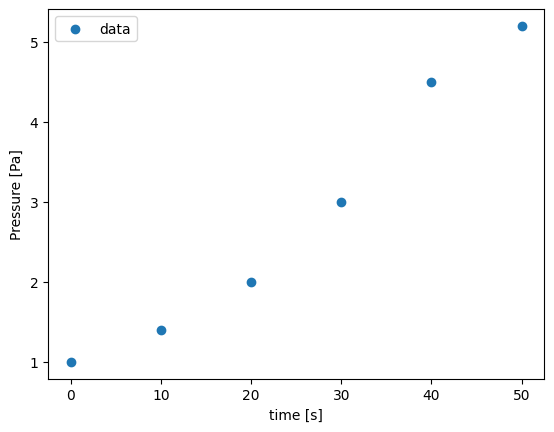

In [2]:
data_df_b_q = pd.read_csv('油回転ポンプ実験b/Q_油回転ポンプ.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_b_q['mintues'],data_df_b_q['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.legend()
plt.show()

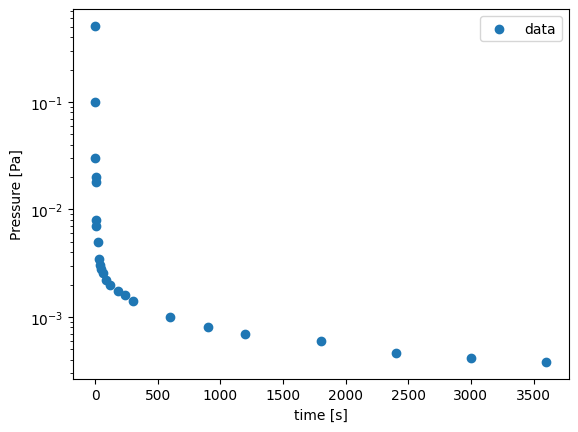

In [10]:
data_df_c_s = pd.read_csv('油拡散ポンプ実験c\油拡散ポンプによる排気.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_c_s['second'],data_df_c_s['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.set_yscale('log')
ax.legend()
plt.show()

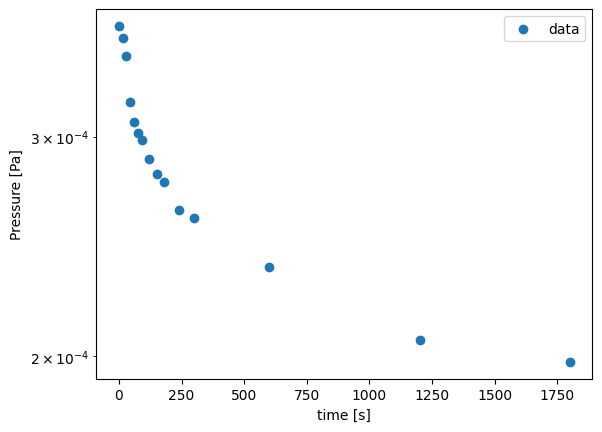

In [4]:
data_df_c_trap = pd.read_csv('油拡散ポンプ実験c/油拡散ポンプにトラップ.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_c_trap['second'],data_df_c_trap['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.set_yscale('log')
ax.legend()

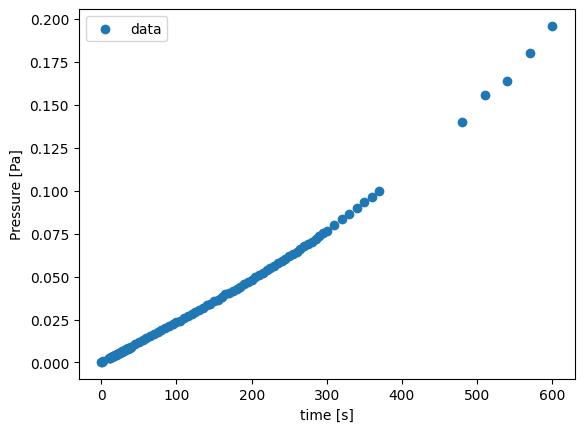

In [5]:
data_df_c_q = pd.read_csv('油拡散ポンプ実験c/油拡散ポンプによるガス放出率.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_c_q['second'],data_df_c_q['Pa'],label='data')
ax.set_xlabel('time [s]')
ax.set_ylabel('Pressure [Pa]')
# ax.set_yscale('log')
ax.legend()
